In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng()


In [105]:

df1 = pd.read_csv("../results/fbs/ab-main-main-2022-09-21T16:10:12+02:00/v1.csv")
df2 = pd.read_csv("../results/fbs/ab-main-main-2022-09-21T16:10:12+02:00/v2.csv")
# df1 = pd.read_csv("../results/fbs/ab-main-perf-issue-request-id-2022-09-21T16:51:43+02:00/v1.csv")
# df2 = pd.read_csv("../results/fbs/ab-main-perf-issue-request-id-2022-09-21T16:51:43+02:00/v2.csv")
# df1 = pd.read_csv("../results/fbs/ab-main-perf-issue-clean-path-2022-09-22T10:29:53+02:00/v1.csv")
# df2 = pd.read_csv("../results/fbs/ab-main-perf-issue-clean-path-2022-09-22T10:29:53+02:00/v2.csv")
df = pd.concat([df1, df2])
df.head(n=30)

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,iter,method,name,scenario,status,url,extra_tags
0,http_reqs,1663769423,1.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.25:3000/destinations,version=v1
1,http_req_duration,1663769423,10.154294,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.25:3000/destinations,version=v1
2,http_req_blocked,1663769423,0.208916,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.25:3000/destinations,version=v1
3,http_req_connecting,1663769423,0.153959,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.25:3000/destinations,version=v1
4,http_req_tls_handshaking,1663769423,0.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.25:3000/destinations,version=v1
5,http_req_sending,1663769423,0.131651,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.25:3000/destinations,version=v1
6,http_req_waiting,1663769423,9.899954,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.25:3000/destinations,version=v1
7,http_req_receiving,1663769423,0.122689,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.25:3000/destinations,version=v1
8,http_req_failed,1663769423,0.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.25:3000/destinations,version=v1
9,http_reqs,1663769423,1.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.25:3000/destinations,version=v1


In [106]:
df_req_durations = df[df["metric_name"] == "http_req_duration"]\
  .groupby(['timestamp', 'extra_tags'])\
  .agg(
    count=('status', 'count'),
    request_duration_median=('metric_value', 'median'),
    request_duration_min=('metric_value', 'min'),
    request_duration_max=('metric_value', 'max')
  ).reset_index()
df_req_durations.rename(columns={'extra_tags': 'version'}, inplace=True)
df_req_durations['version'] = df_req_durations['version'].str.replace('version=', '')
df_req_durations.sort_values("timestamp", inplace=True)
df_req_durations.head(n=10)

,timestamp,version,count,request_duration_median,request_duration_min,request_duration_max
0,1663769423,v1,41,152.712120,10.154294,253.864550
1,1663769423,v2,32,112.273488,9.903101,247.315434
2,1663769424,v1,149,61.446412,6.673191,315.473280
3,1663769424,v2,156,68.399238,6.762034,343.918556
4,1663769425,v1,182,33.871285,1.658566,138.394621
5,1663769425,v2,180,35.298181,1.184192,171.250631
6,1663769426,v1,185,35.307051,1.494614,118.146109
7,1663769426,v2,183,53.408643,3.529287,163.224900
9,1663769427,v2,179,40.442051,1.576341,159.957561
8,1663769427,v1,182,44.196476,2.263936,122.813737


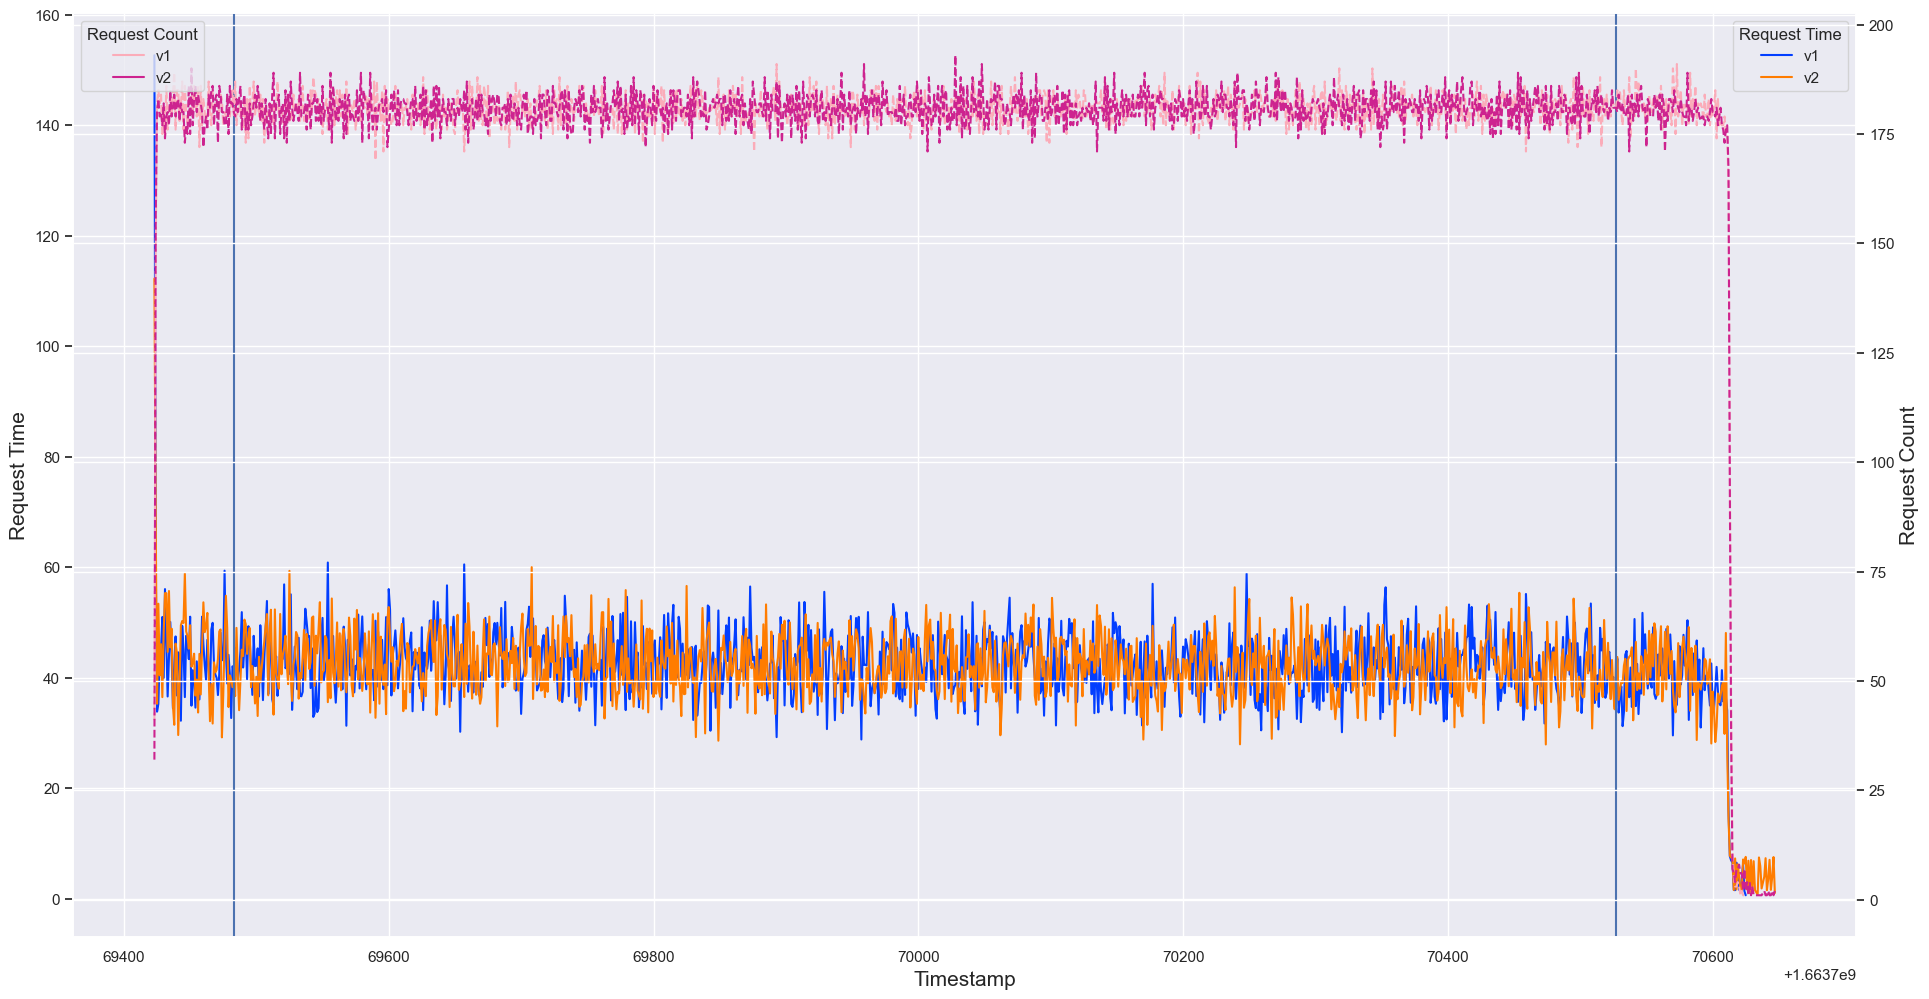

In [107]:
# remove 120 seconds from the last ts
# maxCutoffTs = df_req_durations['timestamp'].max() - 660
maxCutoffTs = df_req_durations['timestamp'].max() - 120
# add 60 seconds to the first ts
minCutoffTs = df_req_durations['timestamp'].min() + 60


# plot
paletteTime = sns.color_palette("bright", 2)
paletteCount = sns.color_palette("RdPu", 2)

sns.set(rc={'figure.figsize':(23,12)})
g = sns.lineplot(data = df_req_durations, x='timestamp', y='request_duration_median', hue='version', palette=paletteTime)
g.axvline(maxCutoffTs)
g.axvline(minCutoffTs)
g.set_xlabel("Timestamp", fontsize = 15)
g.set_ylabel("Request Time", fontsize = 15)
# g.set_ylim([0, 8500])
g.legend(title="Request Time")
ax2 = g.twinx()
ax2.set_ylabel("Request Count", fontsize = 15)
#ax2.set_ylim([0, 2000])
g2 = sns.lineplot(data = df_req_durations, x='timestamp', y='count', hue='version', ax=ax2, palette=paletteCount, linestyle="--")
g2.legend(title="Request Count", loc = 'upper left')

In [108]:
# enforce cutoff
df_filtered = df_req_durations[(df_req_durations['timestamp'] >= minCutoffTs) & (df_req_durations['timestamp'] <= maxCutoffTs)]
df_filtered

,timestamp,version,count,request_duration_median,request_duration_min,request_duration_max
120,1663769483,v1,179,41.546374,7.164114,132.510992
121,1663769483,v2,180,39.204115,5.351186,103.822238
123,1663769484,v2,179,36.685231,1.658152,131.410128
122,1663769484,v1,187,45.373267,3.153910,118.304929
124,1663769485,v1,177,43.091469,7.311966,103.308044
...,...,...,...,...,...,...
2204,1663770525,v1,182,40.141685,0.327336,128.247249
2206,1663770526,v1,181,34.851896,1.680422,94.285732
2207,1663770526,v2,181,34.304101,2.715441,118.393345
2208,1663770527,v1,181,38.500914,1.867740,114.027381


In [109]:
v1Shape = df_filtered[df_filtered['version'] == 'v1'].shape
v2Shape = df_filtered[df_filtered['version'] == 'v2'].shape
assert v1Shape[0] == v2Shape[0]
measurementIndexesSize = v1Shape[0]
measurementIndexesSize

1045

In [110]:
def bootstrap(perfRuntimes1: pd.DataFrame, perfRuntimes2: pd.DataFrame):
  numberOfSamples = 10000
  allRuntimes1 = perfRuntimes1['request_duration_median'].to_numpy()
  allRuntimes2 = perfRuntimes2['request_duration_median'].to_numpy()
  currentMeasurementIndexes = rng.choice(measurementIndexesSize, size=(measurementIndexesSize, numberOfSamples))

  # Bulk selection
  tmp1 = allRuntimes1[currentMeasurementIndexes]
  tmp1 = np.stack(tmp1, axis=1)
  tmp2 = allRuntimes2[currentMeasurementIndexes]
  tmp2 = np.stack(tmp2, axis=1)

  # Get median for both lists
  med1 = np.median(tmp1, axis=1)
  med2 = np.median(tmp2, axis=1)
  R = med2/med1
  R.sort()

  CIsmall = 1 # 99% confidence interval
  small = int((numberOfSamples * CIsmall) / 100 / 2)
  if small == 0: small = 1
  minSmall = R[small-1]
  minSmall = (minSmall - 1) * 100
  maxSmall = R[numberOfSamples-small-1]
  maxSmall = (maxSmall - 1) * 100
  instability = maxSmall - minSmall
  return minSmall, maxSmall, instability

In [111]:
runtimes1 = df_filtered[df_filtered["version"] == 'v1']
runtimes2 = df_filtered[df_filtered["version"] == 'v2']
median1 = runtimes1['request_duration_median'].median()
median2 = runtimes2['request_duration_median'].median()
change = ((median2/median1) - 1) * 100
minci, maxci, instability = bootstrap(runtimes1, runtimes2)
assert maxci >= change
assert change >= minci
print(f"performance change: {change:.2f}% [{minci:.2f} - {maxci:.2f}] ({instability:.2f}%)")

performance change: -0.47% [-2.48 - 1.41] (3.89%)
